In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [3]:
class beta:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def draw(self, size=1):
        return stat.beta.rvs(self.a, self.b, size=size)
    
    def plot(self):
        x = np.linspace(0,1,1000)
        y = stat.beta.pdf(x, self.a, self.b)
        plt.plot(x, y)

In [4]:
class gem: 
    def __init__(self, a):
        self.beta = beta(1, a)
        
    def generate(self, k):
        rhos = []
        prev = 1
        for x in range(k):
            draw = self.beta.draw()[0]
            normalized = draw*prev
            rhos.append(normalized)
            prev *= 1 - draw
        return rhos

In [6]:
g = gem(.1)
output = g.generate(100)
np.sum(output)

1.0

In [83]:
class guassian:
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma
        
    def draw(self, draws=1):
        return np.random.normal(self.mu, self.sigma, draws)
    
    
    def plot(self):
        mu, sigma = self.mu, self.sigma
        x = np.linspace(mu-sigma*3, mu+sigma*3, 1000)
        y = stat.norm.pdf(x, mu, sigma)
        plt.plot(x,y)

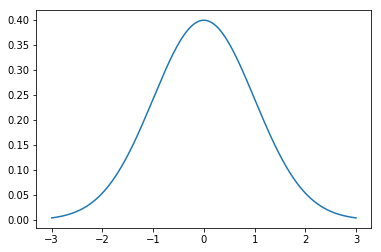

In [84]:
g = guassian(0, 1)
g.plot()

In [94]:
class dirichlet:
    def __init__(self, a, H):
        self.gem = gem(a)
        self.H = H
    
    def generate(self, k):
        return np.array([self.H.draw()[0] for x in range(k)]), self.gem.generate(k)
    
    def plot(self, k):
        x, y = self.generate(k)
        plt.scatter(x, y)
#         sns.distplot(o, bins=100, kde=False)

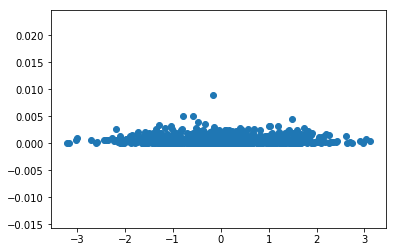

In [101]:
d = dirichlet(1000, g)
d.plot(1000)